# 탄소중립을 위한 기후기술 정보 시각화 경진대회 😊

**기후기술이란 탄소중립 달성을 위해 온실가스를 감축하고 기후변화에 적응하기 위한 기술을 말합니다.**

※기후기술 분류체계

https://www.ctis.re.kr/ko/techClass/classification.do?key=1141


기후기술과 관련하여 다양한 정보를 수집하고 이를 효과적으로 시각화해주세요.

예시로 녹색기술센터에서는 아래와 같이 기후기술과 관련하여 국가R&D 및 산업규모에 대한 통계를 생산하고 있습니다.

※ 기후기술 국가연구개발사업 조사분석 보고서

https://gtck.re.kr/gtck/gtcPublication.do?mode=view&articleNo=2622
※ 기후기술 산업통계 및 보고서

https://bit.ly/3yAiC1z
https://www.gtck.re.kr/gtck/gtcPublication.do?mode=view&articleNo=2621


기후기술 통계 검색 시 노출되는 CTis(국가기후기술정보시스템)는 주최측인 녹색기술센터에서 운영하고 있는  
정보 플랫폼으로 **본 사이트 외에도 다양하게 자료를 수집해주세요.**

In [9]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv("기후기술_영역별_해외진출지역_복수응답__20220602085710.csv", encoding='cp949')

In [10]:
# 윈도우 : "Malgun Gothic"
# 맥 : "AppleGothic"
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


plt.style.use("seaborn-whitegrid")

# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats

%config InlineBackend.figure_format = "retina"

In [8]:
sns.plot(data=df)

,해외진출지역별(1),기후기술분류별(1),기후기술분류별(2),시점,데이터
0,아시아태평양,감축,소계,2019 p),1580
1,아시아태평양,감축,소계,2020,2070
2,아시아태평양,감축,비재생에너지,2019 p),12
3,아시아태평양,감축,비재생에너지,2020,28
4,아시아태평양,감축,재생에너지,2019 p),524
...,...,...,...,...,...
205,기타,적응,산림육상,2020,0
206,기타,융복합,소계,2019 p),11
207,기타,융복합,소계,2020,10
208,기타,융복합,감축 및 적응 융복합,2019 p),11


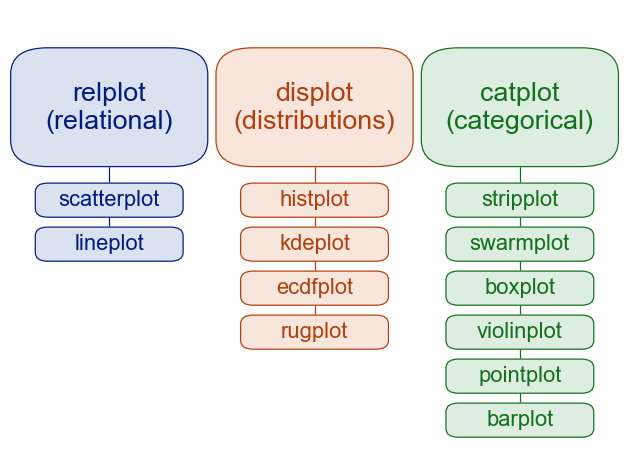

In [30]:
from IPython.display import Image
Image('0.png')

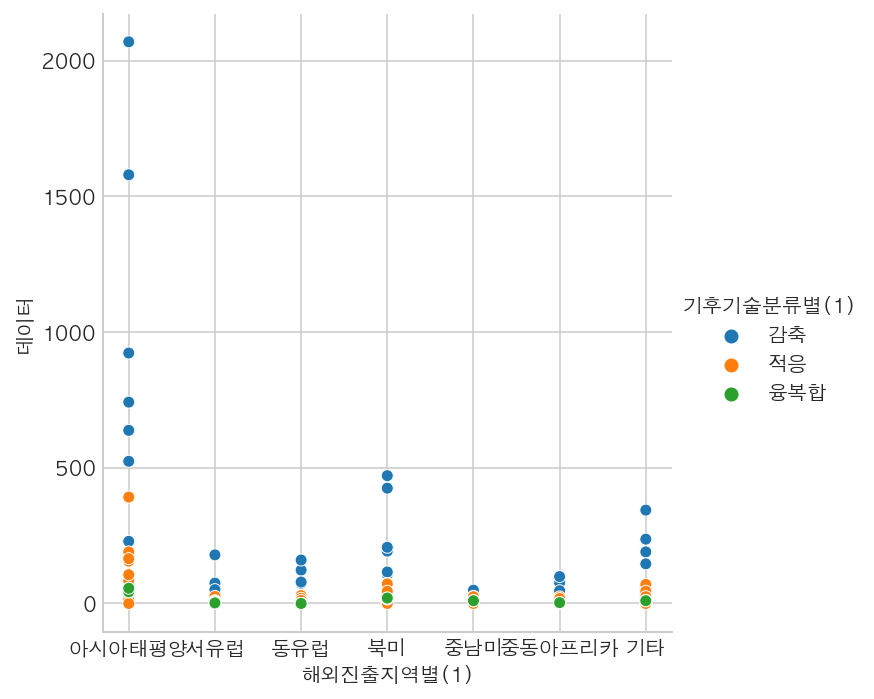

In [65]:
_ = sns.relplot(data=df, x="해외진출지역별(1)", y="데이터", hue="기후기술분류별(1)", kind="scatter")

<AxesSubplot:xlabel='데이터', ylabel='Count'>

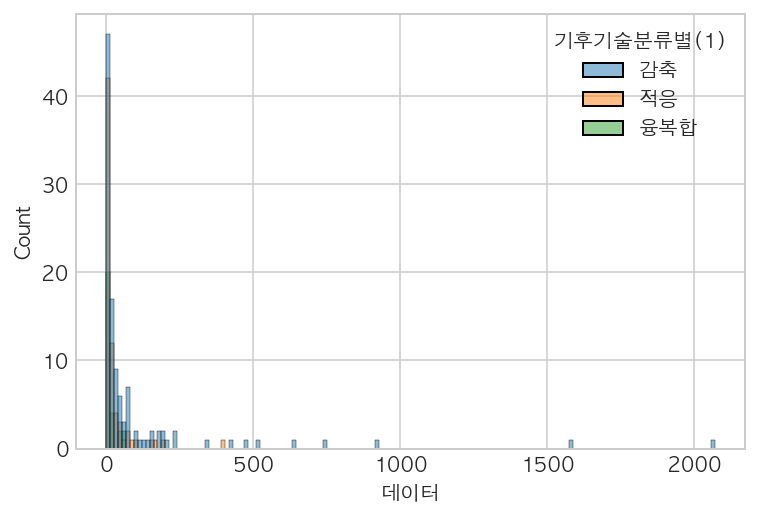

In [68]:
sns.histplot(data=df, x="데이터", hue="기후기술분류별(1)")

In [75]:
df.head()

,해외진출지역별(1),기후기술분류별(1),기후기술분류별(2),시점,데이터
0,아시아태평양,감축,소계,2019 p),1580
1,아시아태평양,감축,소계,2020,2070
2,아시아태평양,감축,비재생에너지,2019 p),12
3,아시아태평양,감축,비재생에너지,2020,28
4,아시아태평양,감축,재생에너지,2019 p),524


In [ ]:
df = df.query("시점==2007")
fig = px.scatter_geo(df, locations="iso_alpha", color="해외진출지역별(1)",
                     hover_name="country", size="데이터",
                     projection="natural earth")

In [79]:
px.data.gapminder().query("year==2007")

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894
